<a href="https://colab.research.google.com/github/himeshps/Tidal_Volume_Submission_230478/blob/main/ModifyingLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the required python libraries, my approach is to find the best fitting model out of the ones mentioned.
#The models that I have used in this notebook are Linear Regression, Support Vector Machine, Gradient Booster Regression, Random Forest Regression.
#I have individually tested all the models and chosen the best one.

#This codeblock is specifically importing for linear regression.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Mounting the google drive to import the dataset.
#I will be leaving the link to the drive on readme commit of the repo for verification purposes.

df = pd.read_csv('/content/drive/MyDrive/TidalVolumeTask_PClub_Recruitment/Dataset_Female.csv')

# Separating the features used for prediction and the target variable

X = df[['age', 'height','chest_circumference', 'BodyMassIndex']]
y = df['tidal_volume']

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

#Feature Scaling
scaler = StandardScaler()

# Fit scaler on training data and transforming the data post partition.
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Implementing Linear Regression model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Final Predictions are delievered here now
y_pred = model.predict(X_val_scaled)

In [5]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 662.3855609687917
R-squared: 0.7747280711605102


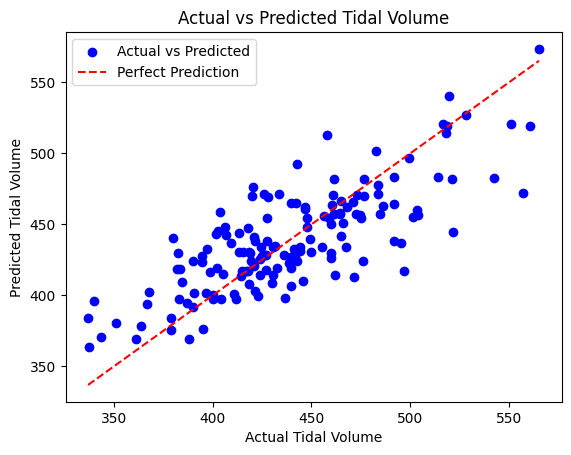

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Making the predictions.
y_pred = model.predict(X)

# Plotting the actual/derived data points.
plt.scatter(y, y_pred, color='blue', label='Actual vs Predicted')

# The regression line is plotted here.
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Perfect Prediction')

# Taking care of the labels and title
plt.xlabel('Actual Tidal Volume')
plt.ylabel('Predicted Tidal Volume')
plt.title('Actual vs Predicted Tidal Volume')
plt.legend()

# Pictoral Representation
plt.show()

# THIS IS *NOT* THE FINAL MODEL AND IS SUBJECT TO NUMEROUS MODIFICATIONS. The one to be treated as final has been mentioned in the README.


In [7]:
def take_input():
    age = int(input("Enter age:"))
    height = int(input("Enter height in cm: "))
    chest_circumference = int(input("Enter chest circumference in cm: "))
    BodyMassIndex = float(input("Enter BMI: "))

    return {'age': [age], 'height': [height],
            'chest_circumference': [chest_circumference], 'BodyMassIndex': [BodyMassIndex]}

# Get input from user for prediction of the tidal volume
print("\nEnter new data for prediction:")
new_data = take_input()

# Data-frame formation
new_df = pd.DataFrame(new_data)

# Prediction of the tidal volume for new data
predicted_tidal_volume = model.predict(new_df)
print(f'Predicted Tidal Volume: {predicted_tidal_volume[0]} ml')

# The user input below is not standard one, I plugged them in randomly just to see if it works (pretty naive but you have the working screenshot on the repo.)


Enter new data for prediction:
Enter age:18
Enter height in cm: 122
Enter chest circumference in cm: 24
Enter BMI: 7
Predicted Tidal Volume: 313.66683259069566 ml


In [8]:
# From hereon, I have used a few approached for the refinement of the efficiency.

# First is POLYNOMIAL REGRESSION:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [9]:
# Mounting the google drive to import the dataset.
#I will be leaving the link to the drive on readme commit of the repo for verification purposes.

df = pd.read_csv('/content/drive/MyDrive/TidalVolumeTask_PClub_Recruitment/Dataset_Female.csv')

# Separating the features used for prediction and the target variable

X = df[['age', 'height','chest_circumference', 'BodyMassIndex']]
y = df['tidal_volume']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
degree = 2  # Specify the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [12]:
# Regularisation (both L1 and L2 , with the elastic net implemented later)
# The exlainations have been provided in the README itself.


from sklearn.linear_model import Ridge, Lasso

model = Ridge(alpha=1.0)  # or Lasso(alpha=0.1)  just an alternative to it (L1 - L2 used complementarily)
model.fit(X_poly_train, y_train)


Ridge()

In [13]:
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)


In [14]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Training R-squared: {r2_train}')
print(f'Test R-squared: {r2_test}')


Training MSE: 827.8369173793834
Test MSE: 781.9190617244898
Training R-squared: 0.5982071581540398
Test R-squared: 0.675813360485937


In [15]:
# I tried using some ensemble method which combines weaker regression models forming a stronger/better one.
# Gradient Boosting Regressor used here, comparison with the previous results has been performed too.

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Test MSE: {mse_test}')
print(f'Test R-squared: {r2_test}')


Test MSE: 992.7317350401706
Test R-squared: 0.5884096182386772


In [ ]:
# It is tiresome to go to each cell and update comments, So I rather explain it all here (everything below)

# I tried some hyperparameter tuning , but it turns out that it can be applied only for a modified linear regression effectively.
# Therefore, employing all the regressors or ensemble methods I have experience with, I tried to work out the tuning after it.

# The improvements in the accuracy of the model were minimal and hence, the first linear regression model works the best with the dataset at our disposal.

In [16]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Test MSE: {mse_test}')
print(f'Test R-squared: {r2_test}')

Test MSE: 898.5580646299055
Test R-squared: 0.6274543828894794


In [17]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Test MSE: {mse_test}')
print(f'Test R-squared: {r2_test}')

Test MSE: 1566.9082139770858
Test R-squared: 0.3503538496735127


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Test MSE: {mse_test}')
print(f'Test R-squared: {r2_test}')

Test MSE: 935.8869709637561
Test R-squared: 0.6119776752691064


In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_elastic_net = grid_search.best_estimator_
print(f'Best alpha: {grid_search.best_params_["alpha"]}')
print(f'Best l1_ratio: {grid_search.best_params_["l1_ratio"]}')


Best alpha: 10
Best l1_ratio: 0.1


In [20]:

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_elastic_net = grid_search.best_estimator_

# Hyperparameters which are optimum will be returned but it does not make much difference to a linear regression model.
print(f'Best hyperparameters: {grid_search.best_params_}')


Best hyperparameters: {'alpha': 10, 'l1_ratio': 0.1}


In [21]:
y_pred = best_elastic_net.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test R-squared: {r2}')


Test MSE: 774.0176188040884
Test R-squared: 0.6790893290011791


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


# I used VIF as a measure to find how well the factors I am modelling are correlated and if so, does it effect the efficiency of my model.
# VIF = Variance Inflation Factor

               feature         VIF
0                  age    8.499140
1               height   94.230497
2  chest_circumference  101.859666
3        BodyMassIndex   51.916669
